In [1]:
!pip install transformers torch pandas matplotlib


In [2]:
from transformers import MarianMTModel, MarianTokenizer

def translate(text, src_lang, tgt_lang):

    model_name = f'Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)


    translated = model.generate(tokenizer.encode(text, return_tensors='pt'))
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

    return translated_text


In [3]:
import pandas as pd
from sklearn.metrics import jaccard_score
from nltk.translate.bleu_score import sentence_bleu
from transformers import MarianMTModel, MarianTokenizer


def translate(text, src_lang, tgt_lang):

    model_name = f'Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)


    translated = model.generate(tokenizer.encode(text, return_tensors='pt'))
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

    return translated_text


language_pairs = [('en', 'fr'), ('en', 'hi'), ('fr', 'de')]
input_text = "Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off."


results = pd.DataFrame(columns=["Language Pair", "Iterations", "Original", "Final", "BLEU Score"])


def calculate_bleu(original, final):
    return sentence_bleu([original.split()], final.split())


for src_lang, tgt_lang in language_pairs:
    for iterations in range(1, 11):
        text = input_text
        print(f"Iteration 0: {text}")
        for i in range(iterations):
            if i % 2 == 0:
                text = translate(text, src_lang, tgt_lang)
                print(f"Iteration {i + 1}: {text}")
            else:
                text = translate(text, tgt_lang, src_lang)
                print(f"Iteration {i + 1}: {text}")

        bleu_score = calculate_bleu(input_text, text)

        # Store the results
        new_row = {
            "Language Pair": f"{src_lang}-{tgt_lang}",
            "Iterations": iterations,
            "Original": input_text,
            "Final": text,
            "BLEU Score": bleu_score
        }
        results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)


results.to_csv("translation_results.csv", index=False)


print(results)


Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Iteration 1: Rajarshi, comment allez-vous aujourd'hui?
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Iteration 1: Rajarshi, comment allez-vous aujourd'hui?


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Iteration 2: Rajarshi, how are you today?
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: Rajarshi, comment allez-vous aujourd'hui?
Iteration 2: Rajarshi, how are you today?
Iteration 3: Rajarshi, comment allez-vous aujourd'hui?
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: Rajarshi, comment allez-vous aujourd'hui?
Iteration 2: Rajarshi, how are you today?
Iteration 3: Rajarshi, comment allez-vous aujourd'hui?
Iteration 4: Rajarshi, how are you today?
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: Rajarshi, comment allez-vous aujourd'hui?
Iteration 2: Rajarshi, how are you today?
Iteration 3: Rajarshi, comment allez-vous aujourd'hui?
Iteration 4: Rajarshi, how are you today?
Iteration 5: Rajarshi, comment allez-vous aujourd'hui?
Iteration

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Iteration 1: अरे, राजाशी, आप आज कैसे कर रहे हैं? वेना कॉफी के बाद? आज बॉस ने हमें एक दिन दे दिया है.
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: अरे, राजाशी, आप आज कैसे कर रहे हैं? वेना कॉफी के बाद? आज बॉस ने हमें एक दिन दे दिया है.


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Iteration 2: Hey, kingy, how are you today? Wea're after coffee?
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: अरे, राजाशी, आप आज कैसे कर रहे हैं? वेना कॉफी के बाद? आज बॉस ने हमें एक दिन दे दिया है.
Iteration 2: Hey, kingy, how are you today? Wea're after coffee?
Iteration 3: अरे, राजा, आप कैसे आज कर रहे हैं? हम कॉफी के बाद कर रहे हैं?
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: अरे, राजाशी, आप आज कैसे कर रहे हैं? वेना कॉफी के बाद? आज बॉस ने हमें एक दिन दे दिया है.
Iteration 2: Hey, kingy, how are you today? Wea're after coffee?
Iteration 3: अरे, राजा, आप कैसे आज कर रहे हैं? हम कॉफी के बाद कर रहे हैं?
Iteration 4: Hey, king, how are you doing today?
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: अरे, राजाशी, आप आज कैसे कर रहे हैं? वेन

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/828k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Iteration 1: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/828k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Iteration 2: Hey, Rajarshi, how are you doing today? Wanna tombe some coffee later? Today Boss has given us a day off.
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 2: Hey, Rajarshi, how are you doing today? Wanna tombe some coffee later? Today Boss has given us a day off.
Iteration 3: Hey, Rajarshi, how are you doing today? Wanna fällt some coffee later? Today Boss has given us a day off.
Iteration 0: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 1: Hey, Rajarshi, how are you doing today? Wanna grab some coffee later? Today Boss has given us a day off.
Iteration 2: Hey, Rajarshi, how are you doing today? Wanna tombe some coffee later? Today Boss has given us a day off.
Iteration 3: Hey, Rajarshi, how are you doing today?

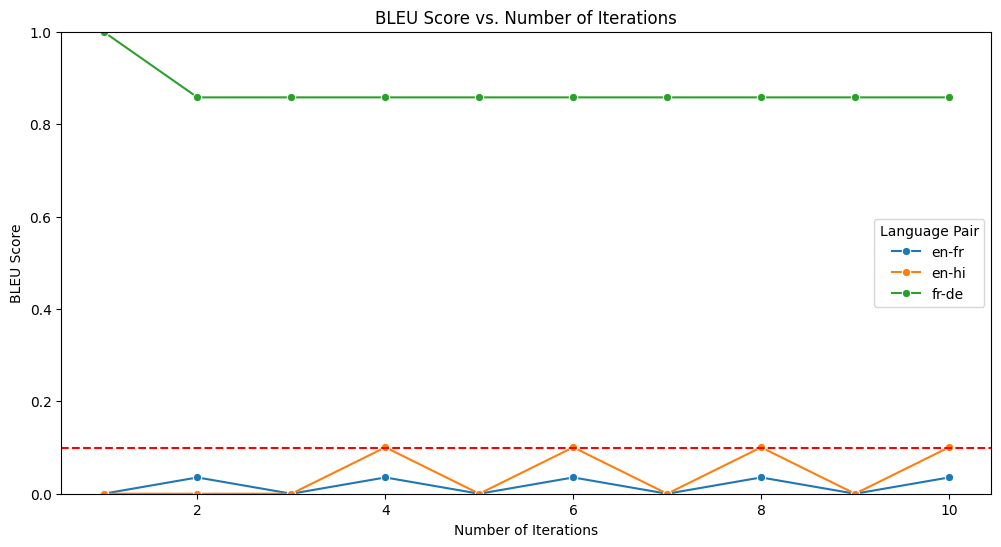

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='Iterations', y='BLEU Score', hue='Language Pair', marker='o')
plt.title('BLEU Score vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('BLEU Score')
plt.ylim(0, 1)
plt.axhline(0.1, color='red', linestyle='--')
plt.show()
